# **APA - Decision Trees**
# DATA 3300



## Name(s): Rebecca Doud

## Assignment APA Decision Trees

# Q1

**Import the `funded.csv` dataset and the required libraries and packages. After viewing a heading of the df, use the `value_counts` function to view the class distribution for `Outcome`.**

**What would you predict the Outcome to be for a new observation? What would be the accuracy of an *a priori* (naive) prediction approach? Show your formula.**


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree #libraries and packages for training model and evaluating performance on test set

import seaborn as sns
import graphviz #libraries for producing visualizations

In [53]:
df = pd.read_csv('/content/funded.csv')
df.head()

,id,industry,months,pfunding,patents,smember,elites,outcome
0,1,healthcare,36,2900000,0,0,5,soldoff-low
1,2,healthcare,31,5500000,0,0,0,ipo
2,3,defense,29,500000,0,0,4,bankrupt
3,4,tech,29,2400000,1,0,5,soldoff-high
4,5,healthcare,31,5300000,0,1,5,ipo


In [54]:
df['outcome'].value_counts()

soldoff-high    384
bankrupt        337
soldoff-low     264
ipo             174
Name: outcome, dtype: int64

In [55]:
a = 384/len(df)
print("apriori accuracy = ", a)

apriori accuracy =  0.33132010353753233


I would predict the outcome to be Sold Off at a high rate, and the a priori accuracy would be 33% (see formula above)

# Q2

**Assign your IVs to an x object and your DV to a y object, then split your data into a training and test set for x and y, using a 80-20 split. Remember to perform any preprocessing necessary on your IVs (*hint: any categorical variables?)***


**Then train a `DecisionTreeClassifier` model from the training set, using "gini" as the criterion, with a max depth of 9, a minimum leaf size of 5, and `min_impurity_decrease = 0.004`.**

In [56]:

x = df.drop(['id','outcome'], axis=1) 
x = pd.get_dummies(data = x, drop_first = False) 

y = df['outcome']

x_train, x_test, y_train, y_test = train_test_split( 
    x, y, test_size = 0.2, random_state = 100)

In [57]:
model = DecisionTreeClassifier(criterion = "gini", random_state=100, 
                               max_depth=9, min_samples_leaf=5, min_impurity_decrease=0.004)

In [58]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, random_state=100)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, random_state=100)

## A 

**Plot your decision tree using the `export_graphviz` function from the `tree` library.**

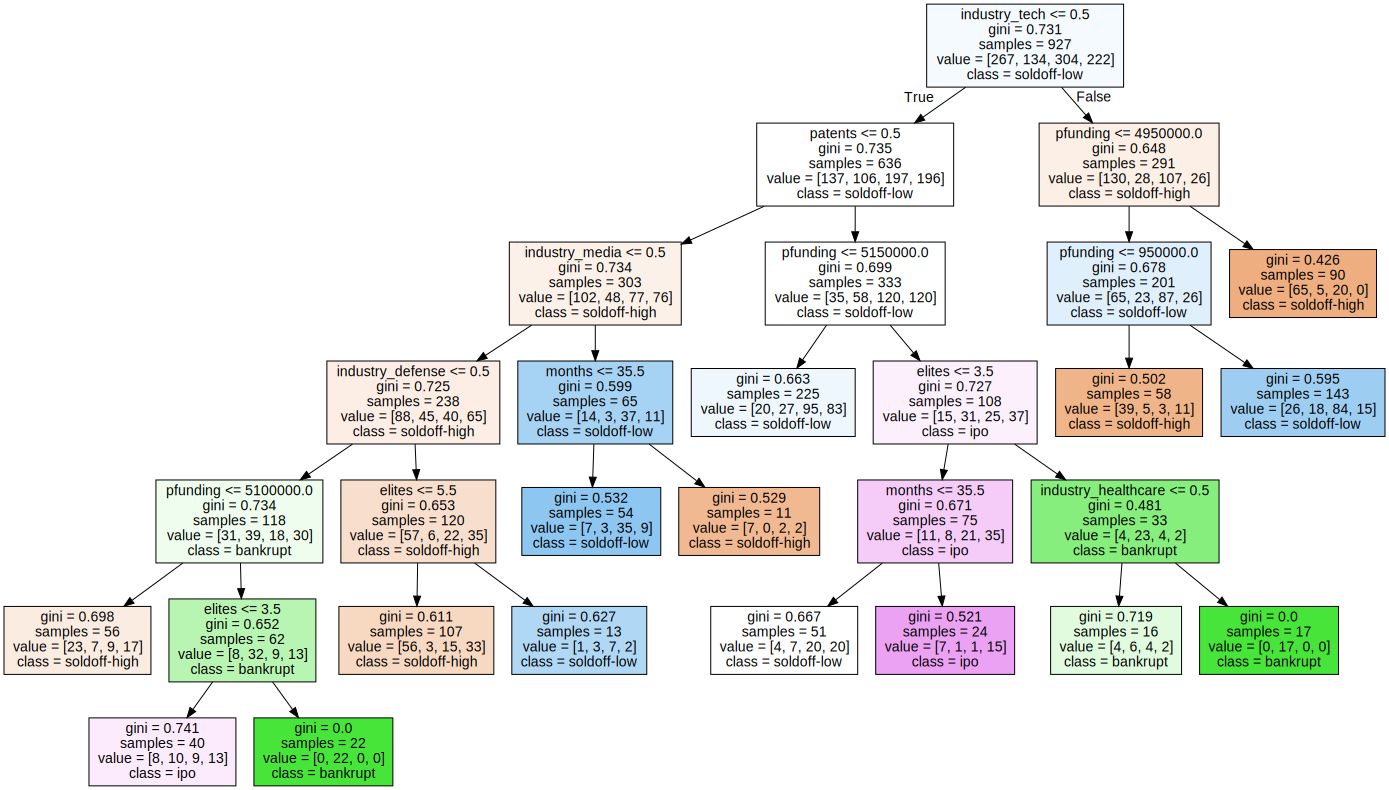

In [59]:
labels = y.value_counts()
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=x.columns,  
                                class_names=labels.index.values,
                                filled=True) 
graph = graphviz.Source(dot_data, format="png") 
graph

## B

**Using your tree plot, what would be the predicted outcome for a defense company who has no patents and 4 elites?** 

**On how many observations would this prediction be based (i.e., how many observations are in the reminal node where the prediction was made)?**

The predicted outcome is Sold Off - High, based on 107 observations, 56 of which were Sold off high. 

# Q3

**Apply your model to the test set to evaluate its accuracy. Create a confusion matrix and then respond to the prompts below.**

In [60]:
predictions = model.predict(x_test)

In [61]:
df_pred = x_test

df_pred['predicted_class'] = predictions
df_pred['actual_class'] = y_test

df_pred

,months,pfunding,patents,smember,elites,industry_defense,industry_healthcare,industry_media,industry_tech,predicted_class,actual_class
662,17,6000000,1,0,5,1,0,0,0,ipo,ipo
492,28,7000000,1,0,4,0,1,0,0,ipo,ipo
137,28,5700000,1,0,2,0,0,0,1,bankrupt,soldoff-high
637,15,8500000,1,0,0,0,1,0,0,soldoff-high,bankrupt
639,36,3300000,1,0,0,1,0,0,0,soldoff-high,soldoff-high
...,...,...,...,...,...,...,...,...,...,...,...
511,41,500000,0,0,3,1,0,0,0,bankrupt,bankrupt
588,27,9300000,1,0,3,0,1,0,0,soldoff-high,ipo
189,27,3300000,1,0,5,0,1,0,0,soldoff-high,bankrupt
1042,42,2700000,1,0,7,1,0,0,0,soldoff-high,ipo


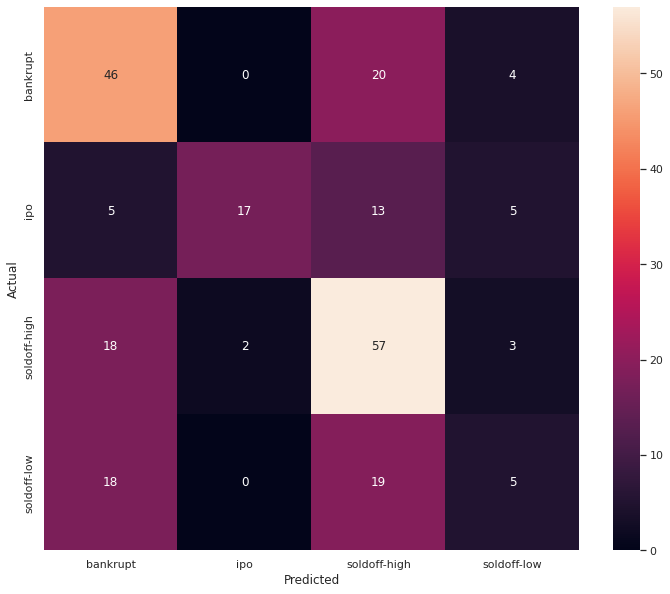

In [62]:
conf = pd.DataFrame(df_pred, columns=['actual_class','predicted_class'])
confusion_matrix = pd.crosstab(conf['actual_class'], conf['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True) 
sns.set(rc={'figure.figsize':(12,10)}) 
plt.show()


## A

**For each of the four outcomes, provide the number of times the model predicted it, the number of times it predicted accurately, and the % accuracy (ratio of the # of predictions / # of accurate predictions).**

* Prediction: **Bankrupt**
  * Times Predicted: 87
  * Predicted Accurately: 46 
  * % Accuracy: 52.9%

* Prediction: **Soldoff-Low**
  * Times Predicted: 17
  * Predicted Accurately: 5
  * % Accuracy: 29.4%

* Prediction: **Soldoff-High**
  * Times Predicted: 109
  * Predicted Accurately: 57
  * % Accuracy: 52.3%

* Prediction: **IPO**
  * Times Predicted: 19
  * Predicted Accurately: 17
  * % Accuracy: 89.5%


## B

**Considering *all* predictions, in what percentage of observations did the model make an accurate prediction? Show your formula.**


In [63]:
accuracy = (5+57+17+46)/len(df)
print("overall accuracy = ", accuracy)

overall accuracy =  0.10785159620362382


## C

**Given this accuracy percentage, does it make more sense to use the *a priori* prediction approach or the decision tree model that was generated? Explain your answer.** 


The accuracy percentage based on all observations is 10.8%, while the a priori prediction was 33%, so it makes more sense to use the a priori prediction. We want the model to usually be at least 10% better than a priori, and the overall accuracy percentage calculated is less than the a priori prediction. 

## Q4

**Next, compare this model's performance against three other possible decision tree models, each of which use different parameters. In a text cell placed before each new model, outline the `criterion` used (e.g., 'gini', 'entropy', or 'log-loss') , the `max_depth`, the `min_samples_leaf`, and the `min_impurity_decrease`.**

**Remember that the first model used the following paramters:**

* `criterion` = gini
* `max_depth` = 5
* `min_samples_leaf` = 8
* `min_impurity_decrease` = 0.004

**So change *at least* one of these parameters for each of your new models.**

**For each model generate a `classification_report` to show its overall accuracy on the test_set.**


### **Model 1:**

* `criterion` = gini
* `max_depth` = 5
* `min_samples_leaf` = 8
* `min_impurity_decrease` = 0.004

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    bankrupt       0.53      0.66      0.59        70
         ipo       0.89      0.42      0.58        40
soldoff-high       0.52      0.71      0.60        80
 soldoff-low       0.29      0.12      0.17        42

    accuracy                           0.54       232
   macro avg       0.56      0.48      0.48       232
weighted avg       0.55      0.54      0.51       232



### **Model 2:** 

* `criterion` = entropy
* `max_depth` = 5
* `min_samples_leaf` = 10
* `min_impurity_decrease` = 0.004

In [84]:
model_2 = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=5, min_samples_leaf=10, min_impurity_decrease=0.004)
model_2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.004, min_samples_leaf=10,
                       random_state=100)

In [85]:
predictions = model_2.predict(x_test)

In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    bankrupt       0.55      0.70      0.62        70
         ipo       0.89      0.42      0.58        40
soldoff-high       0.58      0.61      0.59        80
 soldoff-low       0.49      0.45      0.47        42

    accuracy                           0.58       232
   macro avg       0.63      0.55      0.56       232
weighted avg       0.61      0.58      0.58       232



### **Model 3:**

* `criterion` = gini
* `max_depth` = 8
* `min_samples_leaf` = 8
* `min_impurity_decrease` = 0.004

In [68]:
model_3 = DecisionTreeClassifier(criterion = 'gini', random_state=100, max_depth=8, min_samples_leaf=8, min_impurity_decrease=0.004)
model_3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.004,
                       min_samples_leaf=8, random_state=100)

In [69]:
predictions = model_3.predict(x_test)


In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    bankrupt       0.53      0.66      0.59        70
         ipo       0.89      0.42      0.58        40
soldoff-high       0.52      0.71      0.60        80
 soldoff-low       0.29      0.12      0.17        42

    accuracy                           0.54       232
   macro avg       0.56      0.48      0.48       232
weighted avg       0.55      0.54      0.51       232



### **Model 4:**

* `criterion` = entropy
* `max_depth` = 5
* `min_samples_leaf` = 12
* `min_impurity_decrease` = 0.002

In [71]:
model_4 = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=5, min_samples_leaf=12, min_impurity_decrease=0.002)
model_4.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.002, min_samples_leaf=12,
                       random_state=100)

In [72]:
predictions = model_4.predict(x_test)

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    bankrupt       0.53      0.70      0.60        70
         ipo       0.89      0.42      0.58        40
soldoff-high       0.59      0.60      0.59        80
 soldoff-low       0.49      0.45      0.47        42

    accuracy                           0.57       232
   macro avg       0.62      0.54      0.56       232
weighted avg       0.61      0.57      0.57       232



## A

**What parameters led to the best-performing (highest overall accuracy) model? What was the highest accuracy achieved?**

* `criterion` = entropy
* `max_depth` = 5
* `min_samples_leaf` = 10
* `min_impurity_decrease` = 0.004

These parameters led to the highest accuracy model I came up with, with accuracy of 58%. 

## B

**Plot your best performing decision tree using the `export_graphviz` function from the `tree` library.**

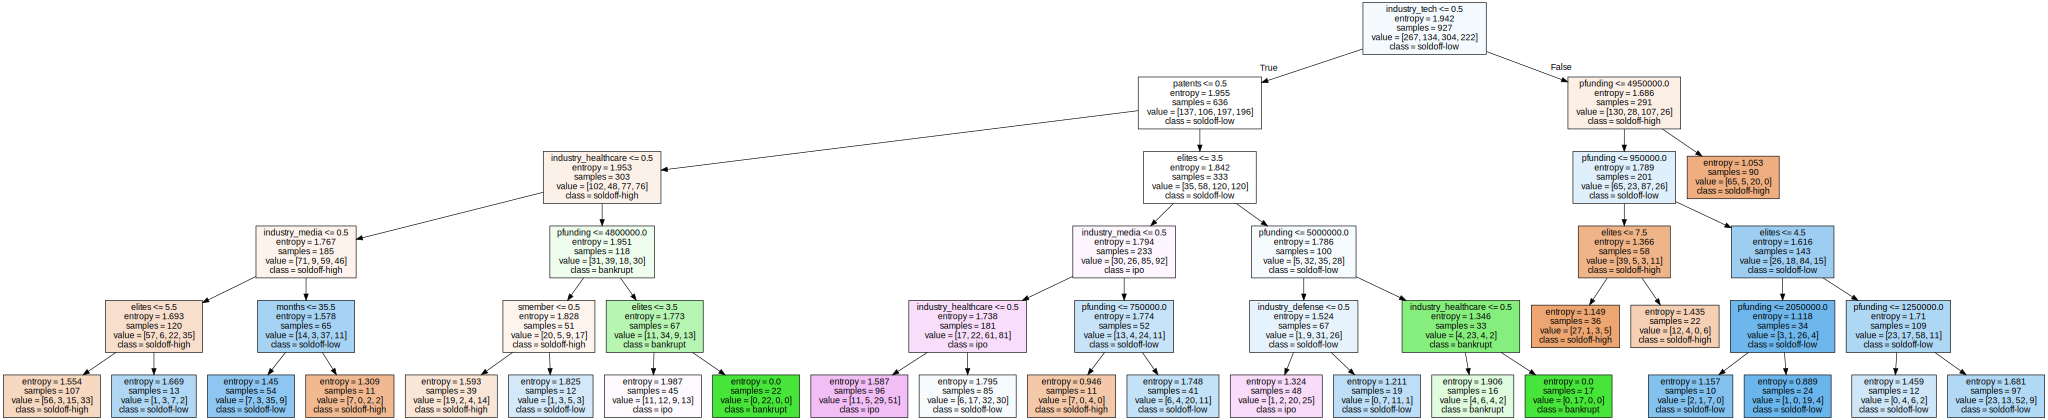

In [74]:
labels = y.value_counts()
dot_data_2 = tree.export_graphviz(model_2, out_file=None, 
                                feature_names=x.columns,  
                                class_names=labels.index.values,
                                filled=True) #plot model

# Draw graph
graph = graphviz.Source(dot_data_2, format="png") 
graph

# Q5

**Arcturus has $11.5 million to invest and is considering from among 23 applicant firms. Create a Decision Trees model using your most accurate model (i.e., whichever model from Model 1-4 has the highest accuracy percentage), then apply the model as necessary to make predictions regarding the applicant firms.** 

**Data regarding these applicant firms can be found in the `fund-applicants.csv` data file. Note that there is no “outcome” column (the outcome hasn’t happened yet!).**

**However, there is an `amount` column, which indicates the requested funding amount. Arcturus wants to make as much money as possible by investing its \$11.5 million, which may require this amount be spread across multiple companies. However, for any specific applicant company, Arcturus must either invest the full requested amount or not at all (e.g., if a company has requested $2,500,000, then Arcturus must either invest \$2,500,000 or make no investment in the company).**

**Begin by importing the `fund-applicant.csv` file, then apply your best model to this new data (after taking any required preprocessing steps).**


In [76]:
df_2 = pd.read_csv('/content/fund-applicants.csv')
df_2.head()

,id,industry,months,pfunding,patents,smember,elites,amount
0,1,tech,36,6800000,1,0,4,4000000
1,2,media,23,6300000,0,1,3,1700000
2,3,healthcare,27,6100000,0,1,0,3000000
3,4,defense,33,2800000,1,0,0,1000000
4,5,defense,39,5600000,1,0,2,5000000


In [90]:
x = df_2.drop(['id', 'amount'], axis=1)
x = pd.get_dummies(data=x, drop_first=False)

## A

**In addition to producing the predicted outcomes, also compute the predicted probabilities of the outcome using the `model.predict_proba()` function.**

**Add both the predicted outcome and the predicted probability as columns to the your dataframe.**

In [93]:
predictions = model_2.predict(x)
proba = np.max(model_2.predict_proba(x), axis=1)

In [94]:
df_2['Predicted_class']= predictions
df_2['Predicted_prob'] = proba
df_2

,id,industry,months,pfunding,patents,smember,elites,amount,Predicted_class,Predicted_prob
0,1,tech,36,6800000,1,0,4,4000000,bankrupt,0.722222
1,2,media,23,6300000,0,1,3,1700000,soldoff-high,0.648148
2,3,healthcare,27,6100000,0,1,0,3000000,soldoff-low,0.288889
3,4,defense,33,2800000,1,0,0,1000000,soldoff-low,0.531250
4,5,defense,39,5600000,1,0,2,5000000,soldoff-low,0.531250
5,6,tech,18,3500000,0,0,8,2500000,soldoff-high,0.536082
6,7,tech,24,4800000,0,1,6,4000000,soldoff-high,0.536082
7,8,defense,30,3900000,0,0,1,1200000,bankrupt,0.523364
8,9,media,41,7800000,0,0,5,3500000,bankrupt,0.636364
9,10,defense,21,7900000,0,0,3,4000000,bankrupt,0.523364


## B

**Describe what the predicted probabilities colum indicates (i.e., what do those values mean?). Are these probabilities based on the training or the test set?**

The predicted probablity represents how confident we are. For example, on row 0, there is a 72% probability that the predicted class is bankrupt, meaning there is a 28% probability that the outcome is something else. These probabilities are based on the test set. 

## C

**Using the info provided from the predicted probabilities and predicted outcomes, indicate the companies' project IDs that Arcturus should invest in if, for the sake of diversification, they wanted to invest their \$11.5 million in one project in each of the four industries: media, tech, healthcare, and defense.** 

**Give the IDs of the projects and explain why you’d recommend each project.**

* **Healthcare:** 21. There is a 100% probability that the outcome of this investment would be an initial public offering, which is extremely profitable. 

* **Defense:** 4. Because Arcturus wants to invest in one company in each industry, this is the best option for defense. There's a 53% probability that they'll lose some money off this investment, so it's better to invest a smaller dollar amount into it, and it's better to invest expecting a low sell out than expecting bankruptcy. 

* **Media:** 2. There is a 65% probability that this investment would result in selling it off for a high return, which is a relatively high chance. Plus, we don't want to go over the 11.5 million allotment for investing. 

* **Tech:** 7. Investing 4 million dollars with a 54% probability of a high sell out would be a good idea. 